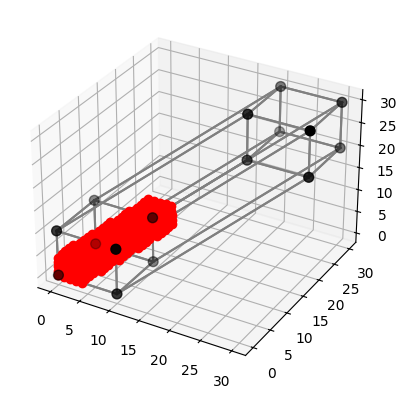

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

# 하이퍼큐브의 16개 꼭짓점 생성
vertices = [(x,y,z,w) for x in [0,10] for y in [0,10] for z in [0,10] for w in [0,10]]

# 4D -> 3D 투영 (w는 x,y,z에 살짝 밀어 넣음)
def project(v, offset=2):
    x,y,z,w = v
    return (x + w*offset, y + w*offset, z + w*offset)

proj_vertices = [project(v) for v in vertices]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 정점 그리기
X, Y, Z = zip(*proj_vertices)
ax.scatter(X, Y, Z, s=50, color="black")

# 같은 큐브의 모서리 + 앞뒤 큐브 연결선
for i, v1 in enumerate(vertices):
    for j, v2 in enumerate(vertices):
        # 두 점이 정확히 한 좌표만 다르면 (즉, 4D에서 인접하면) 선 연결
        if sum(a!=b for a,b in zip(v1,v2)) == 1:
            x1,y1,z1 = proj_vertices[i]
            x2,y2,z2 = proj_vertices[j]
            ax.plot([x1,x2],[y1,y2],[z1,z2], color="gray")

# 예시 경로 (나이트 투어 일부 점)
path = [
    (0,0,0,0),
(2,1,0,0),
(4,0,0,0),
(2,0,1,0),
(0,1,1,0),
(0,0,3,0),
(0,0,1,1),
(0,0,0,3),
(0,1,0,1),
(0,3,0,0),
(2,4,0,0),
(4,3,0,0),
(4,1,1,0),
(4,0,3,0),
(2,0,4,0),
(0,1,4,0),
(0,0,2,0),
(0,0,4,1),
(0,2,4,0),
(1,0,4,0),
(0,0,4,2),
(1,0,4,4),
(0,0,2,4),
(0,1,4,4),
(2,0,4,4),
(0,0,3,4),
(0,2,4,4),
(0,0,4,3),
(1,0,4,1),
(3,0,4,0),
(4,2,4,0),
(4,0,4,1),
(4,0,2,0),
(4,1,4,0),
(4,0,4,2),
(4,1,4,4),
(4,0,2,4),
(3,0,4,4),
(1,0,4,3),
(3,0,4,2),
(4,0,4,0),
(2,0,4,1),
(0,0,4,0),
(0,0,2,1),
(0,1,4,1),
(0,3,4,0),
(0,4,2,0),
(1,4,4,0),
(0,4,4,2),
(1,4,4,4),
(3,3,4,4),
(1,2,4,4),
(0,0,4,4),
(0,2,4,3),
(0,4,4,4),
(0,3,4,2),
(0,4,4,0),
(0,2,3,0),
(1,0,3,0),
(0,0,1,0),
(0,0,3,1),
(0,2,4,1),
(0,1,4,3),
(0,3,4,4),
(2,4,4,4),
(0,4,3,4),
(1,4,1,4),
(3,4,0,4),
(4,4,0,2),
(4,4,1,0),
(4,2,0,0),
(3,0,0,0),
(1,0,0,1),
(1,0,2,0),
(3,0,3,0),
(4,0,1,0),
(2,0,0,0),
(4,0,0,1),
(3,0,0,3),
(1,0,0,4),
(0,0,0,2),
(0,1,0,0),
(1,3,0,0),
(3,4,0,0),
(4,4,2,0),
(4,4,0,1),
(3,4,0,3),
(1,4,0,4),
(0,2,0,4),
(0,0,1,4),
(0,0,3,3),
(2,0,4,3),
(4,0,4,4),
(2,1,4,4),
(1,3,4,4),
(3,4,4,4),
(4,2,4,4),
(4,0,3,4),
(3,0,1,4),
(2,0,3,4),
(0,1,3,4),
(0,0,3,2),
(1,0,3,4),
(1,0,1,3),
(1,0,3,2),
(0,0,1,2),
(0,0,0,4),
(0,0,2,3),
(1,0,0,3),
(0,0,0,1),
(0,0,1,3),
(1,0,1,1),
(3,0,1,0),
(1,0,0,0),
(0,2,0,0),
(0,4,0,1),
(1,4,0,3),
(0,2,0,3),
(0,4,0,4),
(0,2,1,4),
(0,4,2,4),
(0,4,4,3),
(0,3,4,1),
(0,1,4,2),
(1,1,4,0),
(0,1,2,0),
(1,1,0,0),
(3,2,0,0),
(4,4,0,0),
(4,2,1,0),
(4,3,3,0),
(2,3,4,0),
(4,4,4,0),
(4,2,3,0),
(3,4,3,0),
(3,2,4,0),
(1,3,4,0),
(3,4,4,0),
(1,4,4,1),
(1,2,4,0),
(3,1,4,0),
(4,3,4,0),
(2,4,4,0),
(0,4,3,0),
(0,3,1,0),
(0,3,0,2),
(0,4,0,0),
(1,4,2,0),
(0,2,2,0),
(0,4,1,0),
(0,3,3,0),
(1,1,3,0),
(1,0,1,0),
(2,0,3,0),
(0,1,3,0),
(0,3,2,0),
(0,3,0,1),
(0,4,0,3),
(1,4,0,1),
(0,4,2,1),
(0,4,0,2),
(1,4,0,0),
(3,4,1,0),
(4,4,3,0),
(4,4,4,2),
(4,4,3,4),
(3,4,1,4),
(1,4,2,4),
(1,4,4,3),
(0,4,4,1),
(0,3,4,3),
(0,4,2,3),
(0,4,3,1),
(2,4,3,0),
(2,2,4,0),
(2,4,4,1),
(4,4,3,1),
(4,4,4,3),
(4,3,4,1),
(4,1,4,2),
(4,1,3,0),
(2,1,4,0),
(2,0,4,2),
(4,0,4,3),
(4,0,3,1),
(4,2,4,1),
(3,0,4,1),
(1,0,4,2),
(0,2,4,2),
(1,4,4,2),
(3,4,4,1),
(4,4,2,1),
(2,4,2,0),
(4,3,2,0),
(3,3,4,0),
(3,4,4,2),
(4,4,4,4),
(2,4,4,3),
(4,3,4,3),
(4,4,4,1),
(3,4,4,3),
(4,4,2,3),
(4,4,0,4),
(3,4,2,4),
(1,4,3,4),
(0,4,1,4),
(0,4,2,2),
(0,3,2,4),
(1,3,0,4),
(0,1,0,4),
(0,2,2,4),
(0,3,0,4),
(2,4,0,4),
(4,3,0,4),
(4,4,2,4),
(4,3,4,4),
(3,1,4,4),
(2,3,4,4),
(1,1,4,4),
(1,0,2,4),
(0,0,2,2),
(0,1,0,2),
(0,3,0,3),
(0,2,0,1),
(0,1,0,3),
(0,1,2,4),
(0,3,3,4),
(0,4,3,2),
(1,4,3,0),
(3,4,2,0),
(1,4,1,0),
(1,4,0,2),
(3,4,0,1),
(4,4,0,3),
(4,4,1,1),
(2,4,0,1),
(0,4,1,1),
(0,2,1,0),
(2,2,0,0),
(4,1,0,0),
(3,3,0,0),
(1,2,0,0),
(0,2,0,2),
(0,4,1,2),
(0,4,3,3),
(0,2,3,4),
(0,1,1,4),
(0,3,1,3),
(0,2,1,1),
(0,2,3,2),
(0,1,1,2),
(0,1,3,1),
(0,3,2,1),
(1,3,0,1),
(1,4,2,1),
(1,3,4,1),
(2,1,4,1),
(3,3,4,1),
(4,1,4,1),
(4,3,4,2),
(4,1,4,3),
(3,3,4,3),
(1,3,4,2),
(1,1,4,1),
(3,2,4,1),
(3,1,4,3),
(1,2,4,3),
(0,2,2,3),
(0,4,1,3),
(2,4,0,3),
(2,4,2,4),
(4,4,1,4),
(4,4,2,2),
(3,4,0,2),
(3,3,0,4),
(4,1,0,4),
(2,0,0,4),
(1,2,0,4),
(1,0,1,4),
(3,0,0,4),
(4,0,0,2),
(4,0,1,4),
(4,2,0,4),
(4,0,0,3),
(3,0,0,1),
(1,0,0,2),
(1,1,0,4),
(3,2,0,4),
(4,0,0,4),
(2,1,0,4),
(2,0,2,4),
(2,0,0,3),
(1,2,0,3),
(1,4,1,3),
(0,2,1,3),
(0,1,3,3),
(0,3,3,2),
(0,3,1,1),
(0,1,2,1),
(0,3,3,1),
(2,3,4,1),
(1,3,4,3),
(0,3,2,3),
(0,1,2,2),
(1,1,4,2),
(3,1,4,1),
(2,1,4,3),
(4,2,4,3),
(3,0,4,3),
(4,0,2,3),
(4,1,0,3),
(4,2,0,1),
(4,0,1,1),
(2,0,0,1),
(2,0,2,0),
(4,1,2,0),
(4,1,0,1),
(4,0,2,1),
(4,2,2,0),
(3,0,2,0),
(3,1,0,0),
(2,3,0,0),
(4,3,0,1),
(4,2,0,3),
(4,2,2,4),
(3,0,2,4),
(4,0,2,2),
(3,0,0,2),
(3,1,0,4),
(4,1,2,4),
(4,3,3,4),
(2,4,3,4),
(2,2,4,4),
(2,3,4,2),
(4,2,4,2),
(3,2,4,4),
(2,2,4,2),
(2,2,3,0),
(0,2,3,1),
(0,1,1,1),
(0,3,1,2),
(0,1,1,3),
(0,3,1,4),
(0,3,3,3),
(0,1,3,2),
(0,3,2,2),
(0,1,2,3),
(0,2,2,1),
(0,2,3,3),
(0,2,1,2),
(1,2,1,0),
(2,4,1,0),
(2,2,2,0),
(2,2,4,1),
(2,4,4,2),
(2,2,4,3),
(1,2,4,1),
(1,1,4,3),
(2,3,4,3),
(2,1,4,2),
(3,3,4,2),
(1,2,4,2),
(3,1,4,2),
(3,1,3,0),
(2,3,3,0),
(2,1,2,0),
(1,3,2,0),
(3,3,1,0),
(2,1,1,0),
(1,3,1,0),
(3,3,2,0),
(1,3,3,0),
(1,1,2,0),
(3,2,2,0),
(1,2,3,0),
(1,1,1,0),
(2,3,1,0),
(3,1,1,0),
(4,3,1,0),
(3,3,3,0),
(2,1,3,0),
(2,3,2,0),
(3,1,2,0),
(1,2,2,0),
(3,2,1,0),
(3,4,1,1),
(4,4,1,3),
(4,4,3,2),
(2,4,2,2),
(4,4,1,2),
(4,4,3,3),
(3,4,3,1),
(3,2,3,0),
(2,2,1,0),
(2,4,1,1),
(1,4,3,1),
(2,4,3,3),
(2,4,1,4),
(3,4,3,4),
(2,4,3,2),
(1,4,1,2),
(1,4,3,3),
(3,4,2,3),
(2,4,2,1),
(2,4,0,2),
(4,3,0,2),
(4,3,1,4),
(2,3,0,4),
(2,2,0,2),
(2,4,1,2),
(1,4,3,2),
(3,4,2,2),
(1,4,2,3),
(3,4,1,3),
(3,4,3,2),
(3,2,4,2),
(3,0,3,2),
(1,0,3,1),
(3,0,2,1),
(1,0,2,2),
(0,2,2,2),
(1,4,2,2),
(3,4,1,2),
(1,4,1,1),
(2,4,3,1),
(2,4,2,3),
(3,4,2,1),
(3,4,3,3),
(2,4,1,3),
(2,2,1,4),
(1,2,3,4),
(1,3,1,4),
(1,1,2,4),
(1,3,3,4),
(3,3,2,4),
(3,1,3,4),
(2,3,3,4),
(4,2,3,4),
(4,0,3,3),
(4,0,1,2),
(4,1,1,4),
(4,3,2,4),
(4,3,0,3),
(4,1,0,2),
(2,0,0,2),
(2,2,0,1),
(4,2,0,2),
(4,3,2,2),
(3,3,0,2),
(1,3,0,3),
(1,1,0,2),
(3,1,0,1),
(1,2,0,1),
(3,2,0,2),
(4,2,2,2),
(4,0,3,2),
(2,0,2,2),
(2,0,1,4),
(3,0,3,4),
(1,1,3,4),
(1,3,2,4),
(3,3,1,4),
(1,2,1,4),
(3,2,2,4),
(3,2,4,3),
(3,0,3,3),
(4,0,1,3),
(2,0,1,2),
(2,0,3,1),
(1,0,3,3),
(3,0,2,3),
(3,1,0,3),
(2,3,0,3),
(1,1,0,3),
(3,2,0,3),
(3,3,0,1),
(1,3,0,2),
(2,1,0,2),
(2,2,0,4),
(1,2,0,2),
(3,2,0,1),
(1,1,0,1),
(2,3,0,1),
(3,3,0,3),
(2,1,0,3),
(2,1,2,4),
(4,1,3,4),
(4,2,1,4),
(2,1,1,4),
(2,3,2,4),
(3,1,2,4),
(1,2,2,4),
(3,2,3,4),
(4,2,3,2),
(4,1,1,2),
(3,1,1,4),
(3,0,1,2),
(3,2,2,2),
(3,1,0,2),
(2,3,0,2),
(2,1,0,1),
(2,2,0,3),
(2,2,2,4),
(2,0,2,3),
(2,2,2,2),
(3,0,2,2),
(1,0,2,1),
(1,2,2,2),
(1,0,2,3),
(2,0,2,1),
(2,0,1,3),
(3,0,1,1),
(1,0,1,2),
(2,0,3,2),
(2,1,3,4),
(1,1,1,4),
(3,2,1,4),
(3,3,3,4),
(2,3,1,4),
(2,2,3,4),
(2,0,3,3),
(3,0,1,3),
(2,0,1,1),
(3,0,3,1),
(3,2,2,1),
(4,2,2,3),
(4,1,2,1),
(2,1,2,2),
(1,3,2,2),
(1,1,2,1),
(3,1,2,2),
(2,3,2,2),
(1,1,2,2),
(1,3,2,1),
(1,2,2,3),
(2,2,2,1),
(4,3,2,1),
(4,1,2,2),
(3,3,2,2),
(3,1,2,3),
(2,3,2,3),
(4,3,1,3),
(4,2,1,1),
(2,2,1,2),
(4,3,1,2),
(4,1,1,3),
(4,3,2,3),
(4,3,3,1),
(4,1,3,2),
(4,3,3,3),
(4,1,2,3),
(4,2,2,1),
(4,2,1,3),
(2,2,2,3),
(4,2,3,3),
(4,1,3,1),
(2,1,2,1),
(4,1,1,1),
(4,2,3,1),
(4,2,1,2),
(4,3,3,2),
(4,1,3,3),
(2,1,2,3),
(3,3,2,3),
(2,3,2,1),
(4,3,1,1),
(2,2,1,1),
(2,2,3,2),
(1,2,1,2),
(3,2,1,3),
(2,2,3,3),
(1,2,3,1),
(3,2,3,2),
(1,1,3,2),
(2,3,3,2),
(3,3,1,2),
(2,1,1,2),
(2,3,1,3),
(1,1,1,3),
(2,1,3,3),
(1,3,3,3),
(1,3,1,2),
(3,3,1,1),
(2,3,3,1),
(3,1,3,1),
(3,1,1,2),
(2,3,1,2),
(3,3,3,2),
(2,1,3,2),
(2,1,1,1),
(1,3,1,1),
(1,3,3,2),
(3,3,3,3),
(1,3,2,3),
(3,3,1,3),
(3,3,2,1),
(1,3,3,1),
(2,1,3,1),
(3,3,3,1),
(2,3,1,1),
(1,1,1,1),
(2,1,1,3),
(3,1,1,1),
(3,1,3,2),
(1,1,3,3),
(2,3,3,3),
(3,1,3,3),
(3,1,2,1),
(1,1,3,1),
(3,2,3,1),
(1,2,2,1),
(1,1,2,3),
(1,3,1,3),
(1,2,3,3),
(3,2,2,3),
(1,2,1,3),
(3,1,1,3),
(1,1,1,2),
(3,2,1,2),
(1,2,1,1),
(1,2,3,2),
(3,2,3,3),
(2,2,1,3),
(3,2,1,1),
(2,2,3,1),

    ]
proj_path = [project(p) for p in path]
px, py, pz = zip(*proj_path)
ax.plot(px,py,pz, marker='o', color="red")

plt.show()


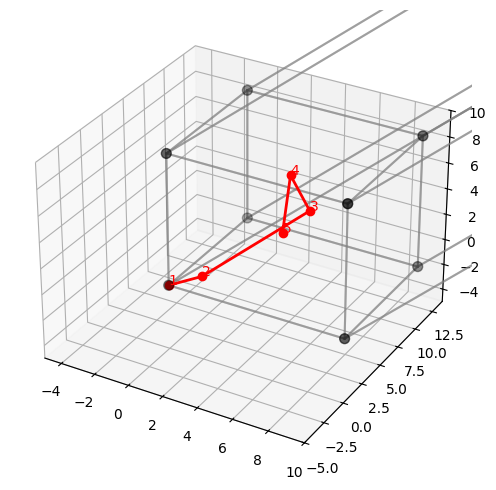

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# 하이퍼큐브 꼭짓점
vertices = [(x,y,z,w) for x in [0,10] for y in [0,10] for z in [0,10] for w in [0,10]]

# 4D -> 3D 투영
def project(v, offset=3):
    x,y,z,w = v
    return (x + w*offset, y + w*offset, z + w*offset)

proj_vertices = [project(v) for v in vertices]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# 하이퍼큐브 고정 그리기
X, Y, Z = zip(*proj_vertices)
ax.scatter(X, Y, Z, s=50, color="black")
for i, v1 in enumerate(vertices):
    for j, v2 in enumerate(vertices):
        if sum(a!=b for a,b in zip(v1,v2)) == 1:  # 인접점
            x1,y1,z1 = proj_vertices[i]
            x2,y2,z2 = proj_vertices[j]
            ax.plot([x1,x2],[y1,y2],[z1,z2], color="gray", alpha=0.5)

# 예시 경로
path = [
    (0,0,0,0),(1,2,0,0),(2,4,1,1),(0,6,2,1),(3,8,1,0)
]
proj_path = [project(p) for p in path]
px, py, pz = zip(*proj_path)

# 경로 애니메이션용
line, = ax.plot([], [], [], color='red', linewidth=2, marker='o')
number_texts = []

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def update(frame):
    x, y, z = px[:frame+1], py[:frame+1], pz[:frame+1]
    line.set_data(x, y)
    line.set_3d_properties(z)

    # 번호 갱신
    for t in number_texts:
        t.remove()
    number_texts.clear()
    for idx in range(frame+1):
        t = ax.text(px[idx], py[idx], pz[idx], str(idx+1), color="red")
        number_texts.append(t)

    return line, *number_texts

# 축 범위
ax.set_xlim(min(px)-5, max(px)+5)
ax.set_ylim(min(py)-5, max(py)+5)
ax.set_zlim(min(pz)-5, max(pz)+5)

ani = FuncAnimation(fig, update, frames=len(path), init_func=init,
                    blit=True, interval=1000, repeat=False)

# GIF 저장
ani.save("hypercube_knight.gif", writer=PillowWriter(fps=1))


In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image, display
import numpy as np
import itertools

# 4D 하이퍼큐브 꼭짓점 생성
vertices = [(x,y,z,w) for x in [0,4] for y in [0,4] for z in [0,4] for w in [0,4]]

# 4D -> 3D 투영
def project(v, offset=0.3):
    x, y, z, w = v
    return (x + w*offset, y + w*offset, z + w*offset)

proj_vertices = [project(v) for v in vertices]

# 예시 4D 경로
path_4d = [
    (0,0,0,0),
(2,1,0,0),
(4,0,0,0),
(2,0,1,0),
(0,1,1,0),
(0,0,3,0),
(0,0,1,1),
(0,0,0,3),
(0,1,0,1),
(0,3,0,0),
(2,4,0,0),
(4,3,0,0),
(4,1,1,0),
(4,0,3,0),
(2,0,4,0),
(0,1,4,0),
(0,0,2,0),
(0,0,4,1),
(0,2,4,0),
(1,0,4,0),
(0,0,4,2),
(1,0,4,4),
(0,0,2,4),
(0,1,4,4),
(2,0,4,4),
(0,0,3,4),
(0,2,4,4),
(0,0,4,3),
(1,0,4,1),
(3,0,4,0),
(4,2,4,0),
(4,0,4,1),
(4,0,2,0),
(4,1,4,0),
(4,0,4,2),
(4,1,4,4),
(4,0,2,4),
(3,0,4,4),
(1,0,4,3),
(3,0,4,2),
(4,0,4,0),
(2,0,4,1),
(0,0,4,0),
(0,0,2,1),
(0,1,4,1),
(0,3,4,0),
(0,4,2,0),
(1,4,4,0),
(0,4,4,2),
(1,4,4,4),
(3,3,4,4),
(1,2,4,4),
(0,0,4,4),
(0,2,4,3),
(0,4,4,4),
(0,3,4,2),
(0,4,4,0),
(0,2,3,0),
(1,0,3,0),
(0,0,1,0),
(0,0,3,1),
(0,2,4,1),
(0,1,4,3),
(0,3,4,4),
(2,4,4,4),
(0,4,3,4),
(1,4,1,4),
(3,4,0,4),
(4,4,0,2),
(4,4,1,0),
(4,2,0,0),
(3,0,0,0),
(1,0,0,1),
(1,0,2,0),
(3,0,3,0),
(4,0,1,0),
(2,0,0,0),
(4,0,0,1),
(3,0,0,3),
(1,0,0,4),
(0,0,0,2),
(0,1,0,0),
(1,3,0,0),
(3,4,0,0),
(4,4,2,0),
(4,4,0,1),
(3,4,0,3),
(1,4,0,4),
(0,2,0,4),
(0,0,1,4),
(0,0,3,3),
(2,0,4,3),
(4,0,4,4),
(2,1,4,4),
(1,3,4,4),
(3,4,4,4),
(4,2,4,4),
(4,0,3,4),
(3,0,1,4),
(2,0,3,4),
(0,1,3,4),
(0,0,3,2),
(1,0,3,4),
(1,0,1,3),
(1,0,3,2),
(0,0,1,2),
(0,0,0,4),
(0,0,2,3),
(1,0,0,3),
(0,0,0,1),
(0,0,1,3),
(1,0,1,1),
(3,0,1,0),
(1,0,0,0),
(0,2,0,0),
(0,4,0,1),
(1,4,0,3),
(0,2,0,3),
(0,4,0,4),
(0,2,1,4),
(0,4,2,4),
(0,4,4,3),
(0,3,4,1),
(0,1,4,2),
(1,1,4,0),
(0,1,2,0),
(1,1,0,0),
(3,2,0,0),
(4,4,0,0),
(4,2,1,0),
(4,3,3,0),
(2,3,4,0),
(4,4,4,0),
(4,2,3,0),
(3,4,3,0),
(3,2,4,0),
(1,3,4,0),
(3,4,4,0),
(1,4,4,1),
(1,2,4,0),
(3,1,4,0),
(4,3,4,0),
(2,4,4,0),
(0,4,3,0),
(0,3,1,0),
(0,3,0,2),
(0,4,0,0),
(1,4,2,0),
(0,2,2,0),
(0,4,1,0),
(0,3,3,0),
(1,1,3,0),
(1,0,1,0),
(2,0,3,0),
(0,1,3,0),
(0,3,2,0),
(0,3,0,1),
(0,4,0,3),
(1,4,0,1),
(0,4,2,1),
(0,4,0,2),
(1,4,0,0),
(3,4,1,0),
(4,4,3,0),
(4,4,4,2),
(4,4,3,4),
(3,4,1,4),
(1,4,2,4),
(1,4,4,3),
(0,4,4,1),
(0,3,4,3),
(0,4,2,3),
(0,4,3,1),
(2,4,3,0),
(2,2,4,0),
(2,4,4,1),
(4,4,3,1),
(4,4,4,3),
(4,3,4,1),
(4,1,4,2),
(4,1,3,0),
(2,1,4,0),
(2,0,4,2),
(4,0,4,3),
(4,0,3,1),
(4,2,4,1),
(3,0,4,1),
(1,0,4,2),
(0,2,4,2),
(1,4,4,2),
(3,4,4,1),
(4,4,2,1),
(2,4,2,0),
(4,3,2,0),
(3,3,4,0),
(3,4,4,2),
(4,4,4,4),
(2,4,4,3),
(4,3,4,3),
(4,4,4,1),
(3,4,4,3),
(4,4,2,3),
(4,4,0,4),
(3,4,2,4),
(1,4,3,4),
(0,4,1,4),
(0,4,2,2),
(0,3,2,4),
(1,3,0,4),
(0,1,0,4),
(0,2,2,4),
(0,3,0,4),
(2,4,0,4),
(4,3,0,4),
(4,4,2,4),
(4,3,4,4),
(3,1,4,4),
(2,3,4,4),
(1,1,4,4),
(1,0,2,4),
(0,0,2,2),
(0,1,0,2),
(0,3,0,3),
(0,2,0,1),
(0,1,0,3),
(0,1,2,4),
(0,3,3,4),
(0,4,3,2),
(1,4,3,0),
(3,4,2,0),
(1,4,1,0),
(1,4,0,2),
(3,4,0,1),
(4,4,0,3),
(4,4,1,1),
(2,4,0,1),
(0,4,1,1),
(0,2,1,0),
(2,2,0,0),
(4,1,0,0),
(3,3,0,0),
(1,2,0,0),
(0,2,0,2),
(0,4,1,2),
(0,4,3,3),
(0,2,3,4),
(0,1,1,4),
(0,3,1,3),
(0,2,1,1),
(0,2,3,2),
(0,1,1,2),
(0,1,3,1),
(0,3,2,1),
(1,3,0,1),
(1,4,2,1),
(1,3,4,1),
(2,1,4,1),
(3,3,4,1),
(4,1,4,1),
(4,3,4,2),
(4,1,4,3),
(3,3,4,3),
(1,3,4,2),
(1,1,4,1),
(3,2,4,1),
(3,1,4,3),
(1,2,4,3),
(0,2,2,3),
(0,4,1,3),
(2,4,0,3),
(2,4,2,4),
(4,4,1,4),
(4,4,2,2),
(3,4,0,2),
(3,3,0,4),
(4,1,0,4),
(2,0,0,4),
(1,2,0,4),
(1,0,1,4),
(3,0,0,4),
(4,0,0,2),
(4,0,1,4),
(4,2,0,4),
(4,0,0,3),
(3,0,0,1),
(1,0,0,2),
(1,1,0,4),
(3,2,0,4),
(4,0,0,4),
(2,1,0,4),
(2,0,2,4),
(2,0,0,3),
(1,2,0,3),
(1,4,1,3),
(0,2,1,3),
(0,1,3,3),
(0,3,3,2),
(0,3,1,1),
(0,1,2,1),
(0,3,3,1),
(2,3,4,1),
(1,3,4,3),
(0,3,2,3),
(0,1,2,2),
(1,1,4,2),
(3,1,4,1),
(2,1,4,3),
(4,2,4,3),
(3,0,4,3),
(4,0,2,3),
(4,1,0,3),
(4,2,0,1),
(4,0,1,1),
(2,0,0,1),
(2,0,2,0),
(4,1,2,0),
(4,1,0,1),
(4,0,2,1),
(4,2,2,0),
(3,0,2,0),
(3,1,0,0),
(2,3,0,0),
(4,3,0,1),
(4,2,0,3),
(4,2,2,4),
(3,0,2,4),
(4,0,2,2),
(3,0,0,2),
(3,1,0,4),
(4,1,2,4),
(4,3,3,4),
(2,4,3,4),
(2,2,4,4),
(2,3,4,2),
(4,2,4,2),
(3,2,4,4),
(2,2,4,2),
(2,2,3,0),
(0,2,3,1),
(0,1,1,1),
(0,3,1,2),
(0,1,1,3),
(0,3,1,4),
(0,3,3,3),
(0,1,3,2),
(0,3,2,2),
(0,1,2,3),
(0,2,2,1),
(0,2,3,3),
(0,2,1,2),
(1,2,1,0),
(2,4,1,0),
(2,2,2,0),
(2,2,4,1),
(2,4,4,2),
(2,2,4,3),
(1,2,4,1),
(1,1,4,3),
(2,3,4,3),
(2,1,4,2),
(3,3,4,2),
(1,2,4,2),
(3,1,4,2),
(3,1,3,0),
(2,3,3,0),
(2,1,2,0),
(1,3,2,0),
(3,3,1,0),
(2,1,1,0),
(1,3,1,0),
(3,3,2,0),
(1,3,3,0),
(1,1,2,0),
(3,2,2,0),
(1,2,3,0),
(1,1,1,0),
(2,3,1,0),
(3,1,1,0),
(4,3,1,0),
(3,3,3,0),
(2,1,3,0),
(2,3,2,0),
(3,1,2,0),
(1,2,2,0),
(3,2,1,0),
(3,4,1,1),
(4,4,1,3),
(4,4,3,2),
(2,4,2,2),
(4,4,1,2),
(4,4,3,3),
(3,4,3,1),
(3,2,3,0),
(2,2,1,0),
(2,4,1,1),
(1,4,3,1),
(2,4,3,3),
(2,4,1,4),
(3,4,3,4),
(2,4,3,2),
(1,4,1,2),
(1,4,3,3),
(3,4,2,3),
(2,4,2,1),
(2,4,0,2),
(4,3,0,2),
(4,3,1,4),
(2,3,0,4),
(2,2,0,2),
(2,4,1,2),
(1,4,3,2),
(3,4,2,2),
(1,4,2,3),
(3,4,1,3),
(3,4,3,2),
(3,2,4,2),
(3,0,3,2),
(1,0,3,1),
(3,0,2,1),
(1,0,2,2),
(0,2,2,2),
(1,4,2,2),
(3,4,1,2),
(1,4,1,1),
(2,4,3,1),
(2,4,2,3),
(3,4,2,1),
(3,4,3,3),
(2,4,1,3),
(2,2,1,4),
(1,2,3,4),
(1,3,1,4),
(1,1,2,4),
(1,3,3,4),
(3,3,2,4),
(3,1,3,4),
(2,3,3,4),
(4,2,3,4),
(4,0,3,3),
(4,0,1,2),
(4,1,1,4),
(4,3,2,4),
(4,3,0,3),
(4,1,0,2),
(2,0,0,2),
(2,2,0,1),
(4,2,0,2),
(4,3,2,2),
(3,3,0,2),
(1,3,0,3),
(1,1,0,2),
(3,1,0,1),
(1,2,0,1),
(3,2,0,2),
(4,2,2,2),
(4,0,3,2),
(2,0,2,2),
(2,0,1,4),
(3,0,3,4),
(1,1,3,4),
(1,3,2,4),
(3,3,1,4),
(1,2,1,4),
(3,2,2,4),
(3,2,4,3),
(3,0,3,3),
(4,0,1,3),
(2,0,1,2),
(2,0,3,1),
(1,0,3,3),
(3,0,2,3),
(3,1,0,3),
(2,3,0,3),
(1,1,0,3),
(3,2,0,3),
(3,3,0,1),
(1,3,0,2),
(2,1,0,2),
(2,2,0,4),
(1,2,0,2),
(3,2,0,1),
(1,1,0,1),
(2,3,0,1),
(3,3,0,3),
(2,1,0,3),
(2,1,2,4),
(4,1,3,4),
(4,2,1,4),
(2,1,1,4),
(2,3,2,4),
(3,1,2,4),
(1,2,2,4),
(3,2,3,4),
(4,2,3,2),
(4,1,1,2),
(3,1,1,4),
(3,0,1,2),
(3,2,2,2),
(3,1,0,2),
(2,3,0,2),
(2,1,0,1),
(2,2,0,3),
(2,2,2,4),
(2,0,2,3),
(2,2,2,2),
(3,0,2,2),
(1,0,2,1),
(1,2,2,2),
(1,0,2,3),
(2,0,2,1),
(2,0,1,3),
(3,0,1,1),
(1,0,1,2),
(2,0,3,2),
(2,1,3,4),
(1,1,1,4),
(3,2,1,4),
(3,3,3,4),
(2,3,1,4),
(2,2,3,4),
(2,0,3,3),
(3,0,1,3),
(2,0,1,1),
(3,0,3,1),
(3,2,2,1),
(4,2,2,3),
(4,1,2,1),
(2,1,2,2),
(1,3,2,2),
(1,1,2,1),
(3,1,2,2),
(2,3,2,2),
(1,1,2,2),
(1,3,2,1),
(1,2,2,3),
(2,2,2,1),
(4,3,2,1),
(4,1,2,2),
(3,3,2,2),
(3,1,2,3),
(2,3,2,3),
(4,3,1,3),
(4,2,1,1),
(2,2,1,2),
(4,3,1,2),
(4,1,1,3),
(4,3,2,3),
(4,3,3,1),
(4,1,3,2),
(4,3,3,3),
(4,1,2,3),
(4,2,2,1),
(4,2,1,3),
(2,2,2,3),
(4,2,3,3),
(4,1,3,1),
(2,1,2,1),
(4,1,1,1),
(4,2,3,1),
(4,2,1,2),
(4,3,3,2),
(4,1,3,3),
(2,1,2,3),
(3,3,2,3),
(2,3,2,1),
(4,3,1,1),
(2,2,1,1),
(2,2,3,2),
(1,2,1,2),
(3,2,1,3),
(2,2,3,3),
(1,2,3,1),
(3,2,3,2),
(1,1,3,2),
(2,3,3,2),
(3,3,1,2),
(2,1,1,2),
(2,3,1,3),
(1,1,1,3),
(2,1,3,3),
(1,3,3,3),
(1,3,1,2),
(3,3,1,1),
(2,3,3,1),
(3,1,3,1),
(3,1,1,2),
(2,3,1,2),
(3,3,3,2),
(2,1,3,2),
(2,1,1,1),
(1,3,1,1),
(1,3,3,2),
(3,3,3,3),
(1,3,2,3),
(3,3,1,3),
(3,3,2,1),
(1,3,3,1),
(2,1,3,1),
(3,3,3,1),
(2,3,1,1),
(1,1,1,1),
(2,1,1,3),
(3,1,1,1),
(3,1,3,2),
(1,1,3,3),
(2,3,3,3),
(3,1,3,3),
(3,1,2,1),
(1,1,3,1),
(3,2,3,1),
(1,2,2,1),
(1,1,2,3),
(1,3,1,3),
(1,2,3,3),
(3,2,2,3),
(1,2,1,3),
(3,1,1,3),
(1,1,1,2),
(3,2,1,2),
(1,2,1,1),
(1,2,3,2),
(3,2,3,3),
(2,2,1,3),
(3,2,1,1),
(2,2,3,1),

]

proj_path = [project(p) for p in path_4d]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# 하이퍼큐브 정점 + 모서리
lines = []
for i, v1 in enumerate(vertices):
    for j, v2 in enumerate(vertices):
        if sum(a!=b for a,b in zip(v1,v2)) == 1:
            x1,y1,z1 = proj_vertices[i]
            x2,y2,z2 = proj_vertices[j]
            l, = ax.plot([x1,x2],[y1,y2],[z1,z2], color='gray', alpha=0.5)
            lines.append(l)

# 경로 애니메이션
line, = ax.plot([], [], [], color='blue', linewidth=1)
number_texts = []

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    for t in number_texts:
        t.remove()
    number_texts.clear()
    return line, *lines

def update(frame):
    x, y, z = zip(*proj_path[:frame+1])
    line.set_data(x, y)
    line.set_3d_properties(z)

    for t in number_texts:
        t.remove()
    number_texts.clear()

    # for idx, (xi, yi, zi) in enumerate(proj_path[:frame+1]):
    #     t = ax.text(xi, yi, zi, str(idx+1), color='blue')
    #     number_texts.append(t)

    return line, *lines, *number_texts

# 좌표 제한
xs, ys, zs = zip(*proj_vertices)
ax.set_xlim(min(xs)-0.1, max(xs)+0.1)
ax.set_ylim(min(ys)-0.1, max(ys)+0.1)
ax.set_zlim(min(zs)-0.1, max(zs)+0.1)

ani = FuncAnimation(fig, update, frames=len(proj_path), init_func=init, blit=True, interval=1000, repeat=False)

ani.save("/content/animation4d_cube.gif", writer=PillowWriter(fps=50))
display(Image(filename="/content/animation4d_cube.gif"))


Output hidden; open in https://colab.research.google.com to view.